## Charger les données
#### 1.Chargez toutes les bibliothèques requises.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



#### 2. Lisez le fichier Risk.csv dans un DataFrame appelé 'strategies'.

In [3]:
strategies = pd.read_csv('Risk.csv')


print(strategies.head())

  Gender State  State_Rate  Height  Weight        BMI  Age  Risk
0   Male    MA    0.100434     184    67.8  20.025992   77  High
1   Male    VA    0.141723     163    89.4  33.648237   82  High
2   Male    NY    0.090803     170    81.2  28.096886   31   Low
3   Male    TN    0.119973     175    99.7  32.555102   39   Low
4   Male    FL    0.110345     184    72.1  21.296078   68  High


## Explorez les données


#### 3. Résumez les colonnes du DataFrame.

In [7]:
print("Informations sur le DataFrame :")
print(strategies.info())


Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1942 non-null   object 
 1   State       1942 non-null   object 
 2   State_Rate  1942 non-null   float64
 3   Height      1942 non-null   int64  
 4   Weight      1942 non-null   float64
 5   BMI         1942 non-null   float64
 6   Age         1942 non-null   int64  
 7   Risk        1942 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 121.5+ KB
None


Dimensions du DataFrame (lignes, colonnes) :
(1942, 8)




#### 4. Inspectez les données.

In [6]:
strategies.head(5)

,Gender,State,State_Rate,Height,Weight,BMI,Age,Risk
0,Male,MA,0.100434,184,67.8,20.025992,77,High
1,Male,VA,0.141723,163,89.4,33.648237,82,High
2,Male,NY,0.090803,170,81.2,28.096886,31,Low
3,Male,TN,0.119973,175,99.7,32.555102,39,Low
4,Male,FL,0.110345,184,72.1,21.296078,68,High


In [4]:
# Ne rien ecrire

,Gender,State,State_Rate,Height,Weight,BMI,Age,Risk
0,Male,MA,0.100434,184,67.8,20.025992,77,High
1,Male,VA,0.141723,163,89.4,33.648237,82,High
2,Male,NY,0.090803,170,81.2,28.096886,31,Low
3,Male,TN,0.119973,175,99.7,32.555102,39,Low
4,Male,FL,0.110345,184,72.1,21.296078,68,High


#### 5. Résumez les données du dataframe.

In [10]:
strategies.describe()

,State_Rate,Height,Weight,BMI,Age
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,0.138064,169.718847,81.155767,28.292804,50.841401
std,0.044180,9.571082,16.009041,5.808799,19.327130
min,0.001000,150.000000,44.100000,16.022174,18.000000
25%,0.110345,162.000000,68.600000,23.739705,34.000000
50%,0.127584,170.000000,81.300000,28.055706,51.000000
75%,0.144251,176.000000,93.800000,32.456822,68.000000
max,0.318100,190.000000,116.500000,46.796193,84.000000


In [5]:
# Ne rien ecrire

,State_Rate,Height,Weight,BMI,Age
count,1942.000000,1942.000000,1942.000000,1942.000000,1942.000000
mean,0.138064,169.718847,81.155767,28.292804,50.841401
std,0.044180,9.571082,16.009041,5.808799,19.327130
min,0.001000,150.000000,44.100000,16.022174,18.000000
25%,0.110345,162.000000,68.600000,23.739705,34.000000
50%,0.127584,170.000000,81.300000,28.055706,51.000000
75%,0.144251,176.000000,93.800000,32.456822,68.000000
max,0.318100,190.000000,116.500000,46.796193,84.000000


#### 6. Créez une matrice de corrélation à l’aide de la fonction 'corr'.

In [16]:
numerical_features = strategies.select_dtypes(include=['float64', 'int64'])

print(numerical_features.corr())



            State_Rate    Height    Weight       BMI       Age
State_Rate    1.000000 -0.016523  0.009233  0.019241  0.112347
Height       -0.016523  1.000000  0.238085 -0.316961 -0.164781
Weight        0.009233  0.238085  1.000000  0.839628  0.011679
BMI           0.019241 -0.316961  0.839628  1.000000  0.102317
Age           0.112347 -0.164781  0.011679  0.102317  1.000000


#### 7. Créez un corrélogramme à l'aide de la fonction 'heatmap' de Seaborn.

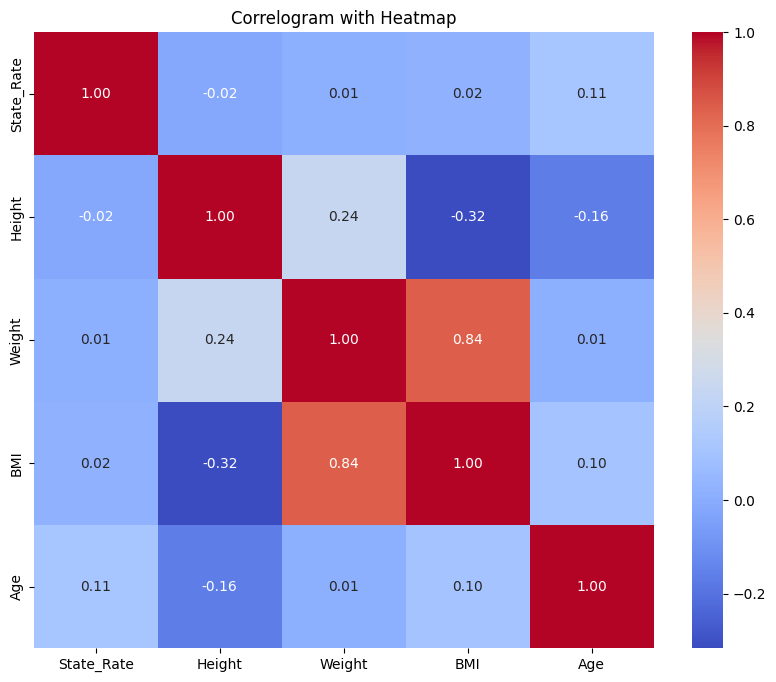

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlogram with Heatmap')
plt.show()

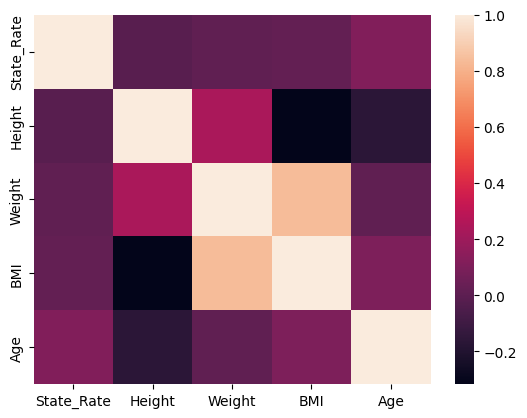

In [7]:
# Ne rien ecrire

#### 8. Inspectez les valeurs manquantes.

In [22]:
strategies.isnull().sum()


Gender        0
State         0
State_Rate    0
Height        0
Weight        0
BMI           0
Age           0
Risk          0
dtype: int64

In [8]:
# Ne rien ecrire

Gender        0
State         0
State_Rate    0
Height        0
Weight        0
BMI           0
Age           0
Risk          0
dtype: int64

## Transformer les données
#### 9. Affecter les caractéristiques suivantes à un DataFrame nommé X : Gender, State_Rate, Height, Weight, BMI et Age.

In [25]:
data = {
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female'],
    'State_Rate': [0.100434, 0.141723, 0.090803, 0.119973, 0.110345, 0.110345, 0.178148, 0.223738, 0.148166, 0.128560],
    'Height': [184, 163, 170, 175, 184, 166, 157, 167, 161, 160],
    'Weight': [67.8, 89.4, 81.2, 99.7, 72.1, 65.6, 84.8, 86.3, 103.8, 90.2],
    'BMI': [20.025992, 33.648237, 28.096886, 32.555102, 21.296078, 23.806068, 34.403018, 30.944100, 40.044751, 35.234375],
    'Age': [77, 82, 31, 39, 68, 45, 58, 50, 76, 79]
}

# Créer le DataFrame
X = pd.DataFrame(data)

# Afficher le DataFrame
print(X)

   Gender  State_Rate  Height  Weight        BMI  Age
0    Male    0.100434     184    67.8  20.025992   77
1    Male    0.141723     163    89.4  33.648237   82
2    Male    0.090803     170    81.2  28.096886   31
3    Male    0.119973     175    99.7  32.555102   39
4    Male    0.110345     184    72.1  21.296078   68
5  Female    0.110345     166    65.6  23.806068   45
6  Female    0.178148     157    84.8  34.403018   58
7  Female    0.223738     167    86.3  30.944100   50
8  Female    0.148166     161   103.8  40.044751   76
9  Female    0.128560     160    90.2  35.234375   79


In [9]:
# Ne rien ecrire

,Gender,State_Rate,Height,Weight,BMI,Age
0,Male,0.100434,184,67.8,20.025992,77
1,Male,0.141723,163,89.4,33.648237,82
2,Male,0.090803,170,81.2,28.096886,31
3,Male,0.119973,175,99.7,32.555102,39
4,Male,0.110345,184,72.1,21.296078,68
...,...,...,...,...,...,...
1937,Female,0.110345,166,65.6,23.806068,45
1938,Female,0.178148,157,84.8,34.403018,58
1939,Female,0.223738,167,86.3,30.944100,50
1940,Female,0.148166,161,103.8,40.044751,76


#### 10. Encodez la variable catégorielle Gender {Female, Male} comme un entier {0, 1}.

In [28]:
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})



#### 11. Inspectez les données transformées.

In [27]:
X.head()

,Gender,State_Rate,Height,Weight,BMI,Age
0,1,0.100434,184,67.8,20.025992,77
1,1,0.141723,163,89.4,33.648237,82
2,1,0.090803,170,81.2,28.096886,31
3,1,0.119973,175,99.7,32.555102,39
4,1,0.110345,184,72.1,21.296078,68


In [11]:
# Ne rien ecrire

,Gender,State_Rate,Height,Weight,BMI,Age
0,1,0.100434,184,67.8,20.025992,77
1,1,0.141723,163,89.4,33.648237,82
2,1,0.090803,170,81.2,28.096886,31
3,1,0.119973,175,99.7,32.555102,39
4,1,0.110345,184,72.1,21.296078,68


#### 12. Créez une nouvelle série pour les étiquettes (Risk) nommée y.

In [86]:
y = pd.Series( pd.read_csv('Risk.csv')['Risk'])


#### 13. Mettez à l’échelle les données des caractéristiques à l’aide du 'StandardScaler'.

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(strategies)
df_scaled = strategies.DataFrame(scaled_data, columns=strategies.columns)
print(df_scaled)

ValueError: could not convert string to float: 'Male'

## Créer l'ensemble d'entraînement et de test

#### 14. Définir les variables X_train, y_train, X_test et y_test contenant les données d'entrainement (80%) et de test (20%). Définissez la valeur de départ du nombre aléatoire sur 42.

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Classificateur Arbre de décision
#### 15. Créez un modèle avec les paramètres par défaut.

In [96]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42) 

#### 16. Entraîner le modèle

In [97]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)


ValueError: could not convert string to float: 'Male'

In [63]:
# Ne rien ecrire

#### 17. Prédire les classes de l'ensemble de test

In [91]:

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

ValueError: could not convert string to float: 'Female'

#### 18. Mesurez de la précision du modèle en affichant le Score de ce modèle

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print( accuracy)

NameError: name 'y_pred' is not defined

In [18]:
# Ne rien ecrire

98.46%


####  19. Affichez la matrice de confusion

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)



NameError: name 'y_pred' is not defined

In [19]:
# Ne rien ecrire

array([[113,   2],
       [  4, 270]], dtype=int64)

####  20. Affichez le rapport de classification

In [67]:
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Rapport de classification :


NameError: name 'y_pred' is not defined

In [20]:
# Ne rien ecrire

              precision    recall  f1-score   support

        High       0.97      0.98      0.97       115
         Low       0.99      0.99      0.99       274

    accuracy                           0.98       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.98      0.98      0.98       389



#### 21. Utilisez l'objet 'KFold' (10 folds) avec la fonction 'cross_val_score' pour déterminer le score de validation correspondant à votre modèle

In [68]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(dt_model, x, y, cv=kfold)
print("Scores de validation croisée :", scores)

NameError: name 'KFold' is not defined

In [21]:
# Ne rien ecrire

array([0.97435897, 0.94871795, 0.92307692, 0.97435897, 1.        ,
       0.97435897, 1.        , 0.97435897, 1.        , 0.94736842])

#### 22. Affichez l'accuracy moyenne et l'écart type correspondant

In [69]:
print(f"Accuracy moyenne : {scores.mean():.2%}")
print(f"Écart type : {scores.std():.2%}")

NameError: name 'scores' is not defined

In [22]:
# Ne rien ecrire

Accuracy moyenne: 97.17%
Ecart type de l accuracy: 2.43%


#### 23. Déterminez la meilleure valeur du paramètre 'max_depth' dans la construction de votre modèle d'arbre de décision, essayez différentes valeurs 'max_depth' (3, 4, 5, 6, 7) , puis comparez les performances de l’estimateur avec chacune.

In [92]:
max_depths = [3, 4, 5, 6, 7]
results = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(dt, x, y, cv=kfold)
    results.append({
        'max_depth': depth,
        'mean_accuracy': scores.mean(),
        'std': scores.std()
    })
    print(f"max_depth={depth} ; Accuracy moyenne={scores.mean():.2%}; Écart type={scores.std():.2%}")

# Trouver la meilleure profondeur
best_depth = max(results, key=lambda x: x['mean_accuracy'])
print(best_depth)

NameError: name 'cross_val_score' is not defined

In [23]:
# Ne rien ecrire

max_depth=3 ; Accuracy moyenne=97.42%; Ecart type=2.31%
max_depth=4 ; Accuracy moyenne=96.91%; Ecart type=2.52%
max_depth=5 ; Accuracy moyenne=97.94%; Ecart type=1.57%
max_depth=6 ; Accuracy moyenne=96.65%; Ecart type=2.32%
max_depth=7 ; Accuracy moyenne=97.42%; Ecart type=1.64%


La meilleur valeur de max_depth est .........

# PARTIE II : DEEP LEARNING

### Dans cette partie on s'interessent à la création d'un modèle ANN. C'est à vous de choisir son architecture et ses hypermamètres. Votre modèle sera valide s'il réussi un accuracy supèrieur ou égal à 95% 

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                   epochs=100,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nPrécision sur l'ensemble de test : {test_accuracy:.2%}")

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(32, 28, 28), dtype=float32). Expected shape (None, 28), but input has incompatible shape (32, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 28, 28), dtype=uint8)
  • training=True
  • mask=None